## <font style="font-family:roboto;color:#455e6c"> Ontologies and workflows in computational materials science</font>  

<div class="admonition note" name="html-admonition" style="background:#e3f2fd; padding: 10px">
<font style="font-family:roboto;color:#455e6c"> IUC17: Ontologies for defects in crystals </font> </br>
</div>

<table table style='table-layout:fixed;width:100%' border="0">
  <th style='width: 33%;'> </th>
<tr>
  <td>
    <img src="images/ocdo_logo.png" width="50%" align="center">
  </td>
  <td>
    <img src="images/logo.png" width="50%" align="center">
  </td>
  <td>
    <img src="images/Logo_NFDI-MatWerk.png" width="50%" align="center">
  </td>
</tr>
</table>

### <font style="font-family:roboto;color:#455e6c"> Introduction </font>

Effective research data management (RDM) is crucial for ensuring reproducibility, collaboration, and long-term accessibility of scientific data. In computational materials science, managing data efficiently involves organizing simulations, tracking metadata, and integrating results into structured knowledge systems.

This notebook demonstrates how to set up and manage workflows using a knowledge graph. It will cover:

- Initializing a computational project with pyiron
- Creating and visualizing atomic structures
- Running molecular dynamics (MD) simulations
- Integrating results into a knowledge graph
- Querying and analyzing stored data
- Ensuring interoperability with external materials databases

### <font style="font-family:roboto;color:#455e6c"> Setting up a research workflow </font>

To begin, we use pyiron_atomistics to set up a structured workspace for our simulations. pyiron simplifies computational materials workflows by providing an integrated environment for structure creation, simulations, and analysis.

In [2]:
%config IPCompleter.evaluation='unsafe'

In [3]:
from pyiron_atomistics import Project
from atomrdf import KnowledgeGraph
import numpy as np

Set up a project and a Knowledge Graph

In [3]:
project = 't1'
pr = Project(project)

### <font style="font-family:roboto;color:#455e6c"> Managing research data with a knowledge graph </font>

A knowledge graph structures research data semantically, making it easier to track relationships between simulations, parameters, and results. This ensures:

- Efficient searchability
- Automated metadata extraction
- Interoperability with other datasets

In [ ]:
kg = KnowledgeGraph(store='db', store_file=f'{project}.db')
kg.enable_workflow(pr, workflow_environment='pyiron')

#clears the full KG, use with caution!
kg.purge(force=True)

### <font style="font-family:roboto;color:#455e6c"> Creating and visualizing atomic structures </font>

Now, we create a crystalline copper structure using pyiron. This atomic model will serve as the foundation for our molecular dynamics simulations.

In [4]:
structure = pr.create.structure.annotated_structure.bulk('Cu', cubic=True)

In [5]:
structure.plot3d()

NGLWidget()

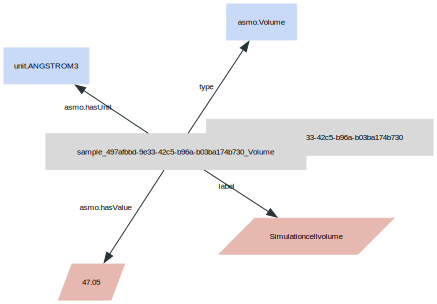

In [6]:
kg.visualise(workflow_view=True)

Key Features:
- `bulk('Cu', cubic=True)`: Generates a bulk cubic structure of copper atoms.
- `plot3d()`: Provides a visual representation of the atomic arrangement.
- `visualise(workflow_view=True)`: Displays the workflow view of the Knowledge Graph.

### <font style="font-family:roboto;color:#455e6c"> Running molecular dynamics simulations </font>

Molecular dynamics (MD) simulations allow us to study atomic interactions over time. Here, we use Lammps to run an NPT (constant Number of atoms, Pressure, Temperature) simulation at 500 K.

In [7]:
job = pr.create.job.Lammps('j1', delete_existing_job=True, delete_aborted_job=True)
job.structure = structure
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'
job.calc_md(pressure=0, temperature=500)
job.run()

The job j1 was saved and received the ID: 1343


Explanation:

- `job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'`: Specifies an empirical interatomic potential.
- `job.calc_md(pressure=0, temperature=500)`: Defines simulation conditions.
- `job.run()`: Executes the simulation.

### <font style="font-family:roboto;color:#455e6c"> Integrating computational results into a knowledge graph </font>

Once the simulation is complete, we register it in the knowledge graph:

In [8]:
kg.add_workflow(job, workflow_environment='pyiron')

This step ensures:
- Automated recording of simulation metadata (e.g., input parameters, results)
- Easier tracking of dependencies and relationships between experiments
- Standardized data representation across research groups

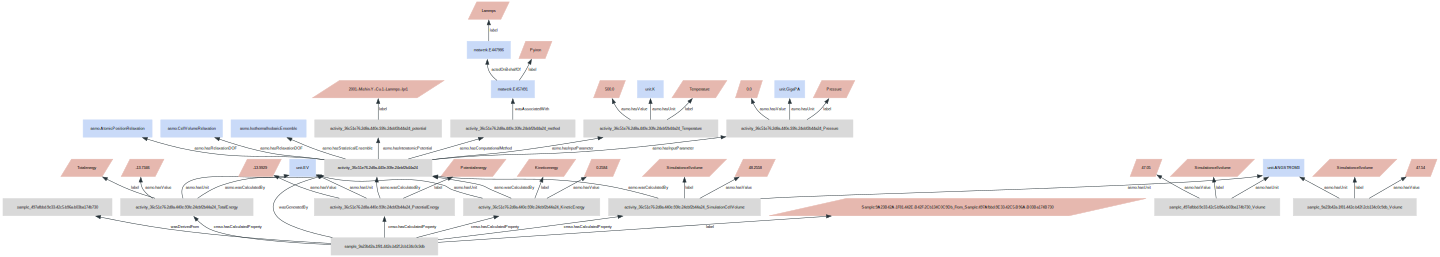

In [9]:
kg.visualise(workflow_view=True, hide_types=True, size=(20,10), layout='dot')

### <font style="font-family:roboto;color:#455e6c"> Querying data from the knowledge graph </font>

For demonstration a dataset of 22 structures generated with pyiron is used. First step is to extract the zip folder into a knowledge graph.

In [11]:
kg = KnowledgeGraph.unarchive('dataset.tar.gz', compress=True)

In [12]:
kg.n_samples

22

The dataset contains 22 samples

Of course, SPARQL queries can be directly run through atomRDF. See an example:

In [13]:
query = """
PREFIX cmso: <http://purls.helmholtz-metadaten.de/cmso/>
SELECT DISTINCT ?sample ?symbol ?number 
WHERE {
    ?sample cmso:hasMaterial ?material .
    ?material cmso:hasStructure ?structure .
    ?structure cmso:hasSpaceGroupSymbol ?symbol .
    ?sample cmso:hasNumberOfAtoms ?number .
FILTER (?number="4"^^xsd:integer)
}"""

The above query finds the Space Group symbol of all structures which have four atoms.

In [14]:
kg.query(query)

,sample,symbol,number
0,sample:10ffd2cc-9e92-4f04-896d-d6c0fdb9e55f,Pm-3m,4
1,sample:1f6b1b0f-446a-4ad8-877e-d2e6176797df,Fm-3m,4
2,sample:286c3974-962b-4333-a2bb-d164ae645454,Fm-3m,4
3,sample:67be61c7-f9c7-4d46-a61d-5350fd0ee246,Fm-3m,4
4,sample:721b7447-8363-4e65-9515-9da2581d7124,Fm-3m,4
5,sample:8fc8e47b-acee-40f8-bcbf-fc298cc31f05,Fm-3m,4
6,sample:9f0f48d1-5ebf-4f7a-b241-5e7aa273f5a0,Fm-3m,4
7,sample:a3cf6d97-c922-4c4d-8517-e784df83b71e,Fm-3m,4
8,sample:ab2bea57-39ea-49ea-ad3f-c1c40b013154,Fm-3m,4
9,sample:aef7472e-7577-4256-8422-6ba77a954ce1,Fm-3m,4


The results are given in the form of a Pandas DataFrame.

This query can also be performed programmatically, which looks like this:

In [16]:
kg.query_sample([kg.terms.cmso.hasSpaceGroupSymbol, 
                 kg.terms.cmso.hasNumberOfAtoms==4])

,AtomicScaleSample,hasSpaceGroupSymbolvalue,hasNumberOfAtomsvalue
0,sample:10ffd2cc-9e92-4f04-896d-d6c0fdb9e55f,Pm-3m,4
1,sample:286c3974-962b-4333-a2bb-d164ae645454,Fm-3m,4
2,sample:8fc8e47b-acee-40f8-bcbf-fc298cc31f05,Fm-3m,4
3,sample:9f0f48d1-5ebf-4f7a-b241-5e7aa273f5a0,Fm-3m,4
4,sample:e54c0e91-52ec-4c47-8ba3-43979a1ebe2e,Fm-3m,4
5,sample:1f6b1b0f-446a-4ad8-877e-d2e6176797df,Fm-3m,4
6,sample:67be61c7-f9c7-4d46-a61d-5350fd0ee246,Fm-3m,4
7,sample:721b7447-8363-4e65-9515-9da2581d7124,Fm-3m,4
8,sample:a3cf6d97-c922-4c4d-8517-e784df83b71e,Fm-3m,4
9,sample:ab2bea57-39ea-49ea-ad3f-c1c40b013154,Fm-3m,4


Some example queries are shown below.

__All samples that have been used for an energy calculation__

In [17]:
kg.auto_query(kg.terms.cmso.AtomicScaleSample, 
              kg.terms.asmo.EnergyCalculation)

,AtomicScaleSample,EnergyCalculation
0,sample:e54c0e91-52ec-4c47-8ba3-43979a1ebe2e,activity:f61a2139-2dae-4aab-954e-73d34d7bc042
1,sample:721b7447-8363-4e65-9515-9da2581d7124,activity:0848b931-d647-41c7-a6dc-8150989e36c7
2,sample:ab2bea57-39ea-49ea-ad3f-c1c40b013154,activity:8a680cb2-c7f1-4747-95b0-a4ce71fab87f
3,sample:b1f52dc6-5c92-428f-8f7a-78794fd0544c,activity:2e461195-15a4-45ba-b369-5a2429ded084
4,sample:d015cfca-e047-40bc-baab-423e87fa2618,activity:1e081e86-73fd-45e5-8341-cab787b9ff0c
5,sample:fb01a7f2-8984-442b-a32e-15321c4fa99b,activity:923e1808-efdf-4a6a-a5de-9e0a64cb198c


__Which of those had an input parameter, called Temperature?__

In [18]:
kg.auto_query(kg.terms.cmso.AtomicScaleSample, [kg.terms.asmo.EnergyCalculation,
                                                kg.terms.rdfs.label@kg.terms.asmo.InputParameter=='temperature'])

,AtomicScaleSample,EnergyCalculation,InputParameter_labelvalue
0,sample:e54c0e91-52ec-4c47-8ba3-43979a1ebe2e,activity:f61a2139-2dae-4aab-954e-73d34d7bc042,temperature


And the value

In [19]:
kg.auto_query(kg.terms.cmso.AtomicScaleSample, [kg.terms.asmo.EnergyCalculation,
                                                kg.terms.rdfs.label@kg.terms.asmo.InputParameter=='temperature',
                                                kg.terms.asmo.hasValue@kg.terms.asmo.InputParameter])

,AtomicScaleSample,EnergyCalculation,InputParameter_labelvalue,InputParameter_hasValuevalue
0,sample:e54c0e91-52ec-4c47-8ba3-43979a1ebe2e,activity:f61a2139-2dae-4aab-954e-73d34d7bc042,temperature,500.0


**What is the composition and space group of these structures**

In [22]:
kg.auto_query(kg.terms.cmso.AtomicScaleSample, [
        kg.terms.rdfs.label@kg.terms.asmo.InputParameter=='temperature',
        kg.terms.asmo.hasValue@kg.terms.asmo.InputParameter,
        kg.terms.cmso.hasSpaceGroupSymbol,
        kg.terms.cmso.hasChemicalSymbol,
        kg.terms.cmso.hasElementRatio])

,AtomicScaleSample,InputParameter_labelvalue,InputParameter_hasValuevalue,hasSpaceGroupSymbolvalue,hasChemicalSymbolvalue,hasElementRatiovalue
0,sample:e54c0e91-52ec-4c47-8ba3-43979a1ebe2e,temperature,500.0,Fm-3m,Cu,1.0


The equivalent query is SPARQL which was executed is shown below.

In [24]:
q = kg.auto_query(kg.terms.cmso.AtomicScaleSample, [
        kg.terms.rdfs.label@kg.terms.asmo.InputParameter=='temperature',
        kg.terms.asmo.hasValue@kg.terms.asmo.InputParameter,
        kg.terms.cmso.hasSpaceGroupSymbol,
        kg.terms.cmso.hasChemicalSymbol,
        kg.terms.cmso.hasElementRatio],
             return_query=True)
print(q)

PREFIX cmso: <http://purls.helmholtz-metadaten.de/cmso/>
PREFIX qudt: <http://qudt.org/schema/qudt/>
PREFIX pldo: <http://purls.helmholtz-metadaten.de/pldo/>
PREFIX podo: <http://purls.helmholtz-metadaten.de/podo/>
PREFIX asmo: <http://purls.helmholtz-metadaten.de/asmo/>
PREFIX ns: <http://www.w3.org/ns/>
PREFIX calculation: <https://w3id.org/mdo/calculation/>
PREFIX ldo: <http://purls.helmholtz-metadaten.de/cdos/ldo/>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?AtomicScaleSample ?InputParameter_labelvalue ?InputParameter_hasValuevalue ?hasSpaceGroupSymbolvalue ?hasChemicalSymbolvalue ?hasElementRatiovalue
WHERE {
    ?AtomicScaleSample prov:wasGeneratedBy ?asmo_AddAtom .
    ?asmo_AddAtom asmo:hasInputParameter ?InputParameter .
    ?InputParameter rdfs:label ?InputParameter_labelvalue .
    ?InputParameter asmo:hasValue ?InputParameter_hasValuevalue .
    ?Ato

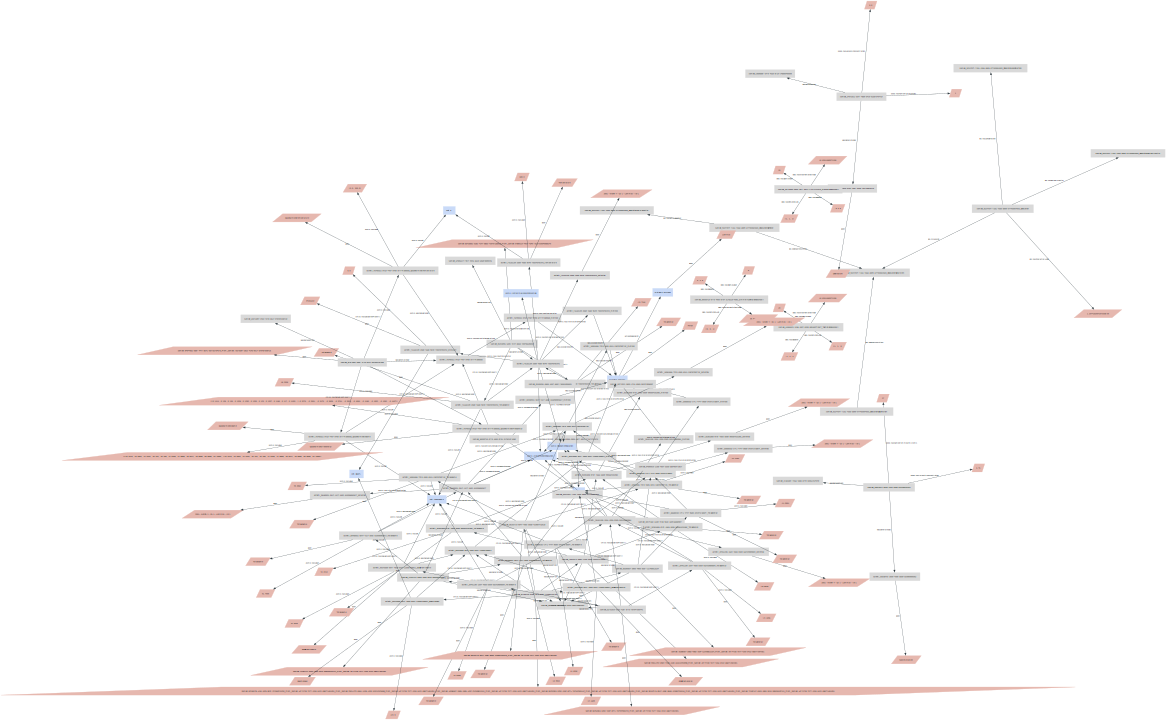

In [28]:
kg.visualise(workflow_view=True, hide_types=True, size=(20,10))

### <font style="font-family:roboto;color:#455e6c"> Ensuring interoperability with external materials databases </font>

Interoperability is a key aspect of modern research data management. By ensuring that our workflows and data structures are compatible with widely used materials science platforms such as [Materials Project](https://next-gen.materialsproject.org/), researchers can:

- Compare their computational results with experimental and high-throughput databases.
- Reuse validated material parameters and properties for further simulations.
- Enhance collaboration by sharing semantically annotated data.

To query results from Materials Project and add to the knowledge graph, an API key is needed. See [here](https://next-gen.materialsproject.org/api). Please add the API key to a file `apikey.txt`.

In [29]:
with open("apikey.txt", 'r') as fin:
    apikey = fin.read().strip()

Further copper structures are queried and added to the knowledge graph

In [36]:
samples = kg.query_structure_from_mp(apikey, chemical_system=["Cu"], is_stable=False)

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

In [37]:
kg.n_samples

37

In [40]:
samples[-2].plot3d()

NGLWidget()

### <font style="font-family:roboto;color:#455e6c"> Obtaining new materials properties from existing data </font>

In [4]:
kg = KnowledgeGraph.unarchive('DC3_dataset_Al.tar.gz', compress=True)

In [5]:
kg.n_samples

289

In [6]:
element = 'Al'

In [8]:
condition = (kg.terms.rdfs.label@kg.terms.asmo.InputParameter=='temperature') & \
            (kg.terms.rdfs.label@kg.terms.cmso.CalculatedProperty=='Volume')

kg.auto_query(kg.terms.cmso.AtomicScaleSample, 
             [condition,
              kg.terms.cmso.hasReference@kg.terms.asmo.hasInteratomicPotential, 
              kg.terms.asmo.hasValue@kg.terms.asmo.InputParameter,
              kg.terms.asmo.hasValue@kg.terms.cmso.CalculatedProperty,]
             )

,AtomicScaleSample,InputParameter_labelvalue,hasInteratomicPotential_hasReferencevalue,InputParameter_hasValuevalue,CalculatedProperty_hasValuevalue,CalculatedProperty_labelvalue


### <font style="font-family:roboto;color:#455e6c"> Conclusion </font>

Managing computational research data effectively ensures reproducibility, collaboration, and long-term usability. Key takeaways:
- Structured workflows improve data organization and reduce redundancy.
- Knowledge graphs enhance traceability and metadata management.
- Automated workflows facilitate seamless integration across simulations.
- Interoperability with external materials databases enables reuse of data.

<div class="admonition note" name="html-admonition" style="background:#e3f2fd; padding: 10px">
<font style="font-family:roboto;color:#455e6c;text-align:justify"> <a href="https://atomrdf.pyscal.org/en/latest/">atomRDF</a> | <a href="https://github.com/OCDO">Open Crystallographic Defects Ontologies</a> | <a href="https://nfdi-matwerk.de/">NFDI MatWerk</a> </font> </br>
</div>